In [1]:
import numpy as np
from matplotlib import pyplot as plt
import SimpleITK as sitk
import pickle as pkl

import cv2
from body_center import body_center
%load_ext autoreload
%autoreload 2

# Find the center of the body, which is slightly different from the center of the CT Image

In [2]:

import pickle as pkl
from cv2 import cvtColor

def to_grayscale(img):
    original_shape = img.shape[:2]
    img = cvtColor(img,cv2.COLOR_BGR2GRAY).astype(float)
    img /= np.max(img)
    return img
def centroid3(img):
    nx, ny, nz = img.shape
    # print(nx,ny,nz)
    imgx = np.sum(np.sum(img, axis=1), axis=1)
    imgy = np.sum(np.sum(img, axis=2), axis=0)
    imgz = np.sum(np.sum(img, axis=0), axis=0)
    denom = np.sum(np.sum(np.sum(img, axis=0), axis=0), axis=0)
    cx = np.sum(np.linspace(0, nx-1, nx)*imgx)/denom
    cy = np.sum(np.linspace(0, ny-1, ny)*imgy)/denom
    cz = np.sum(np.linspace(0, nz-1, nz)*imgz)/denom
    
    return cx, cy, cz

def plot_img_at(img, coord, label='Target Location',
    vmin = 0.4,
    vmax = 0.8,ax=None):
    '''
        Plot the 3D slicing view of img at coord.
    '''
    img = np.array(img)
    img += -np.min(img)
    img /= np.max(img)
   
    l,p,s = coord
    
    
    target_marker = 'x'
    target_size = 50
    target_color = 'yellow'

  
    if ax is None:
        ax = plt.gca()
    ax.axis('off')
    
    # Only plot the horizontal slice.
    ax.imshow(np.squeeze(img[:,:,s]).T,cmap='gray',vmin=vmin,vmax=vmax)
    ax.scatter(l,p,marker = target_marker,s=target_size,color = target_color,label=label)
    ax.legend()    
    return ax
def visualize_body(img,target_pixel=None,label=None,
                    vmin = 0.4,
                    vmax = 0.8,ax=None):
    img = sitk.GetArrayViewFromImage(img).astype(float)
    img = np.swapaxes(img,0,2)
    if target_pixel is None:
        target_pixel = np.array(centroid3(img))
        label = 'Centroid location'
    plot_img_at(img,np.array(target_pixel,dtype=int),label,vmin,vmax,ax)
    
    
def flip_img(input_img,orders):
    flipped_ct = sitk.Flip(input_img,orders)
    flipped_ct = sitk.GetImageFromArray(sitk.GetArrayFromImage(flipped_ct).astype(np.float64))
    flipped_ct.SetOrigin(input_img.GetOrigin())
    flipped_ct.SetSpacing(input_img.GetSpacing())
    return flipped_ct

In [3]:
body_ct = sitk.ReadImage('./nifty/CT_phantom_regular.nii.gz')
body_ct = flip_img(body_ct,[True,False,False])

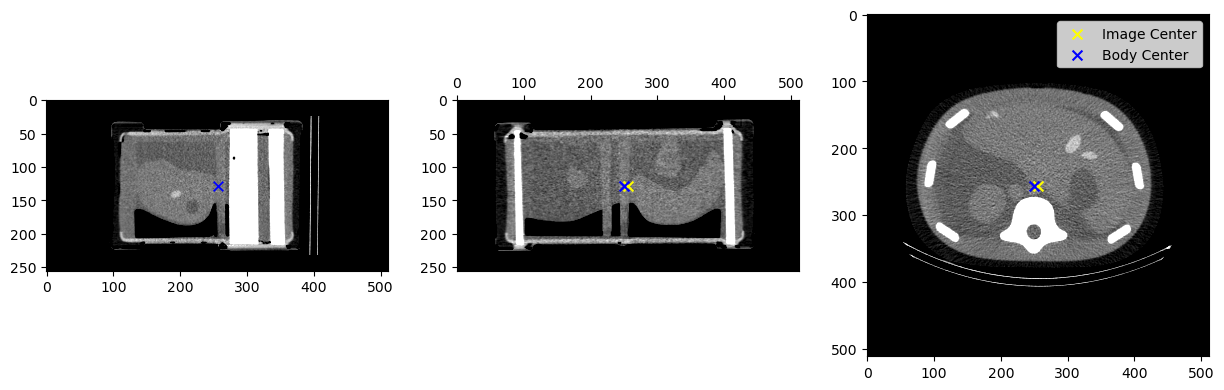

In [4]:
vmin = 0.6
vmax = 0.8

center = np.array(body_ct.GetSize())/2
center = center.astype(int)
img = sitk.GetArrayViewFromImage(body_ct).astype(float)
img = np.swapaxes(img,0,2)

img = np.array(img)
img += -np.min(img)
img /= np.max(img)

l,p,s = center
ll,pp,ss = body_center(body_ct)


target_marker = 'x'
target_size = 50
target_color = 'yellow'

plt.figure(figsize=(15,5))

ax = plt.subplot(1, 3, 1)


ax.imshow(np.squeeze(img[l,:,:]).T,cmap='gray',vmin=vmin,vmax=vmax)
ax.scatter(p,s,marker = target_marker,s=target_size,color = target_color)
ax.scatter(pp,ss,marker = target_marker,s=target_size,color = 'blue')

ax = plt.subplot(1, 3, 2)

ax.xaxis.tick_top()
ax.xaxis.set_label_position('top') 
# ax.invert_yaxis()


ax.imshow(np.squeeze(img[:,p,:]).T,cmap='gray',vmin=vmin,vmax=vmax)
ax.scatter(l,s,marker = target_marker,s=target_size,color = target_color)
ax.scatter(ll,ss,marker = target_marker,s=target_size,color = 'blue')



ax = plt.subplot(1, 3, 3)
ax.imshow(np.squeeze(img[:,:,s]).T,cmap='gray',vmin=vmin,vmax=vmax)
ax.scatter(l,p,marker = target_marker,s=target_size,color = target_color,label='Image Center')
ax.scatter(ll,pp,marker = target_marker,s=target_size,color = 'blue',label = 'Body Center')

ax.legend()    